Math 215 - HW4 Template - Due Friday, October 25, 2024 by 11:59 pm 40 points total

1.  Text analysis - read and analyze a text file
2.  Break and Decode a substitution cipher
3.  Make a dictionary of kmer locations in yeast genome and plot a 4-mer spectrum



1. (15 points)  Write code to do all of the following text analysis tasks:

A. (3 points)  Read a text passage from a text file.  The filename should be stored in a variable filename so that it can be easily changed.

B. (3 points)  Determine and display the number of words in the file.  For this exercise a word is sequence of characters delimited by white space in the text passage.  (So, the url at the beginning of the NobelPrizeAI.txt file will count as one word.)

C. (3 points)  Create a word frequency dictionary for the text passage.  The words should be converted to lower case and stripped of punctuation before you enter them in the dictionary, so "science", "Science" and "science?" all count as the same word.

D. (3 points)  Display the total number of words and the number of distinct words in the text passage.

E. (3 points)  Display a nicely formatted table of the 20 most frequently occurring words in the text passage

Sample output for the file NobelPrizeAI.txt is shown below.  I may test your code on other text files by changing the file name.

Sample output corrected on Oct 23

```
The text passage contains 754 words.
The text passage contains 394 distinct words.

The 20 most frequently used words are:
word        freq
--------------------
the          54
and          25
to           23
of           21
a            20
in           14
is           12
a.i          10
on           10
that          9
nobel         9
prize         8
it            8
for           6
science       6
or            6
human         5
us            5
physics       5
than          5
```







In [34]:
file_name = "NobelPrizeAI.txt" #A

with open(file_name, 'r') as input_file:
  indiv_words = input_file.read().split() # list of words split based on whitespace
# print(indiv_words)

# total words implementation #B & #D
print(f'The text passage contains {len(indiv_words)} words.')

# unique words implementation #D
distinct_words = set() # set already deals accounts for duplicates

for word in indiv_words:
  no_punc_word = ''.join(character for character in word if character.isalnum()) # concatenates chars in word from list as long as char = letter or num
  # isalnum ~ https://www.w3schools.com/python/ref_string_isalnum.asp
  distinct_words.add(no_punc_word.lower()) # .lower bc set doesn't account for case-insensitive duplicates

print(f'The text passage contains {len(distinct_words)} distinct words.\n')

# Word frequency dictionary #C
for i in range(len(indiv_words)):
  indiv_words[i] = indiv_words[i].lower()
for i in range(len(indiv_words)):
  indiv_words[i] = ''.join(char for char in indiv_words[i] if char.isalnum()) # splitting based off punc

word_freq = {}
for key in indiv_words:
  if key in word_freq:
    word_freq[key] +=1 # increments value if key already exists
  else:
    word_freq[key] = 1 # creates key and initializes value to 1

# Formatted table of most frequent words #E --Display a nicely formatted table of the 20 most frequently occurring words in the text passage
top_word_freq = set() # to ensure that words with highest freqs aren't counted twice

word_with_max_freq = ''
value_of_max_freq = 0
i = 0
while i < 20:
  for key in word_freq:
    if word_freq[key] > value_of_max_freq:
      value_of_max_freq = word_freq[key]
      word_with_max_freq = key
  del word_freq[word_with_max_freq] # deletes most frequent key/value so that subsequent iterations can find "next" most frequent
  top_word_freq.add((word_with_max_freq, value_of_max_freq)) # add associated key and value of max-value/freq to set
  value_of_max_freq = 0 # impt to reset otherwise next iteration will compare to prev max freq-value and fail
  i+=1

ordered_freq_set = sorted(top_word_freq, key=lambda x:x[1], reverse=True)
# sorted() param key set to lambda (basically just a short-note fxn) that passes in the given set as 'x' and sorts each element based on second element x[1] (int freq)

print('The 20 most frequenly used words in the file are:')
for i in range(10):
  print('--', end='')
print()

for pair in ordered_freq_set:
  format_len_1 = len('Word: ')
  format_len_2 = len('Freq: ')
  spacing_width = 25 - (format_len_1 + len(pair[0])) - (format_len_2 + 1) # +1 accounts for space taken up by freq value
  formatting_spaces = ' ' * spacing_width # inserts certain # of spaces between word and freq totaling char_count to 25

  print(f'Word: {pair[0]}', end='')
  print(formatting_spaces, end='')
  print(f'Freq: {pair[1]}') # uses indexing since each element in set is a tuple


# format spacing for chart brainstorm below:

# 25 (arbitrary) characters total, 25 - 13 (for format_len_1 + longest word which is physics) = 12, - 7 which is format_len_2 + minimum space that freq_value takes up


The text passage contains 759 words.
The text passage contains 397 distinct words.

The 20 most frequenly used words in the file are:
--------------------
Word: the         Freq: 54
Word: and         Freq: 25
Word: to          Freq: 23
Word: of          Freq: 21
Word: a           Freq: 20
Word: in          Freq: 14
Word: is          Freq: 12
Word: ai          Freq: 10
Word: on          Freq: 10
Word: nobel       Freq: 9
Word: that        Freq: 9
Word: prize       Freq: 8
Word: it          Freq: 8
Word: or          Freq: 6
Word: for         Freq: 6
Word: science     Freq: 6
Word: us          Freq: 5
Word: than        Freq: 5
Word: physics     Freq: 5
Word: human       Freq: 5


2.  (15 points)  Write a program to break a Caesar cipher.  

Input:  A filename of an encoded passage of text based on the alphaber a..z, all on lower case letters that has been encoded with a substitution-shift cipher.

Output:  Print the decoded text to the screen

In the colab notebook for September 19 I provided code to encode and decode text with a caesar cipher.  A sample coded text file, codedtext.txt is provided.  I created that file by encodind the NobelPrizeAI.txt file, using a caesar cipher.  I removed the url at the beginning (that makes it too easy to break the code!)  I may test your code on different files.

You make assume that the alphabet used is a..z, all lower case, and that non-letter characters (whitespace and punctuation) are just copied over as is.

You must include a text cell or comment explaining your method for breaking the code.

Grading:

(3 points)  Read in the coded text from the file

(5 points)  Break the code

(5 points)  Clearly explain your algorithm

(2 points)  Display the decoded text


Your explanation of how you will break the code goes here.

Explanation: I start my decryption by first creating a dictionary of the frequency that letters pop up in the decoded text. I take this logic from the first question of this assignment where we are interpreting a text file. The reason I do this runs on the general assumption that as per the English language, the letter 'e' shows up the most, irrespective of what word it is. If this is the case, the letter (key of dictionary) with the highest frequency should logically correspond to the letter 'e'. With this key quantity from the dictionary in account, I need to somehow relate the index in the alphabet of this letter in the encoded text to the index of e in the alphabet. I do this by subtracting 4 (the alphabetical index of e) from the alphabetical index of the frequent letter from the encoded text. Afterward, I need to modulus this with 26 (alphab. length). This is because I want my actual decoding operation to move in one direction (forward) and to allow this, I need to standardize for negative shifts. For example, if 'b' is the most frequent letter in the encoded text, that results in a negative shift of 3 from 'e'. If I only want to move forward when applying the shift to the encoded passage, I need to find the remainder between this negative difference and 26 - modulus allows values to wrap around the divisor (26), so that 'b' results in a shift of 23. Once this shift is obtained, I can iterate through each letter in the encoded text, obtain it's alphabetical index, apply the shift that was calculated based on e and the corresponding most-frequently appearing letter in the encoded text, re-associate that shifted value with its alphabetical index, and append that corresponding letter to an empty string. This *should* represent the decoded text based on any sort of consistent shift applied.


In [60]:
filename = input('What is the file name of the coded text: ')
with open(filename, 'r') as input_file:
  file_content = input_file.read()

alphabet = 'abcdefghijklmnopqrstuvwxyz'

letter_freq = {}
for letter in file_content: # organize how often letter in encoded text pops up
  if letter in alphabet:
    if letter in letter_freq:
      letter_freq[letter] +=1
    else:
      letter_freq[letter] = 1 # creates key and value of freq 1 if key not already inserted

most_freq_letter = max(letter_freq, key=letter_freq.get) # gamble that this represents e in decoded text
most_freq_index = alphabet.index(most_freq_letter)
encoding_shift = (most_freq_index - 4) % 26 # 4 represents index of 'e', need to % 26 to ensure that negative differences wrap around alphabet

decoded_text = '' # decryption algo below largely adapted from Sept19 notes...
for letter in file_content:
  if letter in alphabet: # makes sure to skip punctuation
    letter_num = alphabet.index(letter)
    find_shift = (letter_num - encoding_shift) % 26 # (again to account for negative differences - frequent letters that pop up before e in alphabet)
    find_freq_letter = alphabet[find_shift]
    decoded_text += find_freq_letter
  else:
    decoded_text += letter # accounts for punctuation still in decoded string

print('Your decoded text passage:\n')
print(decoded_text, '\n')

shift_verification = input(str(f'Is a shift of {encoding_shift} applied to your encoded passage correct? (y/n): '))
if shift_verification == 'y':
  print('Successful Decryption')
else:
  print('Looks like we need to recalculate the encryption shift...rerun')

What is the file name of the coded text: codedtext.txt
Your decoded text passage:

observers have grown increasingly vocal in recent years about the threat that artificial intelligence poses to the human variety. a.i. models can write and talk like us, draw and paint like us, crush us at chess and go. they express an unnerving simulacrum of creativity, not least where the truth is concerned.

a.i. is coming for science, too, as this week’s nobel prizes seemed keen to demonstrate. on tuesday, the nobel prize in physics was awarded to two scientists who helped computers “learn” closer to the way the human brain does. a day later, the nobel prize in chemistry went to three researchers for using a.i. to invent new proteins and reveal the structure of existing ones — a problem that stumped biologists for decades, yet could be solved by a.i. in minutes.

cue the grousing: this was computer science, not physics or chemistry! indeed, of the five laureates on tuesday and wednesday, arguably onl

3.  (15 points)  Analysis of a txt file of the genome of an organism and k-mers
https://en.wikipedia.org/wiki/K-mer

A. (3 points) Open and read the text file Saccharomyces18S.txt  (a yeast)

B. (6 points) A k-mer is a substring of a sequence of nucleotides of length k.  (Substring, as opposed to subsequence, means there are no gaps).  Create a dictionary of the frequencies of all of the 4-mers in Saccharomyces18S.  The keys should be the distinct k-mers occuring in Saccharomyces18S and the values should be the frequency of occurrence of each 4-mer.  Do not include 4-mers that do not appear in Saccharomyces18S.  I have written testing code for you to query the dictionay you create.

C. (6 points)  A method of visualizing k-mers, the k-mer spectrum, shows the multiplicity of each k-mer in a sequence versus the number of k-mers with that multiplicity. (from wikipedia).  Compute the 4-mer spectrum of Saccharomyces18S and show the result graphically.  The graph from my solution is shown below:

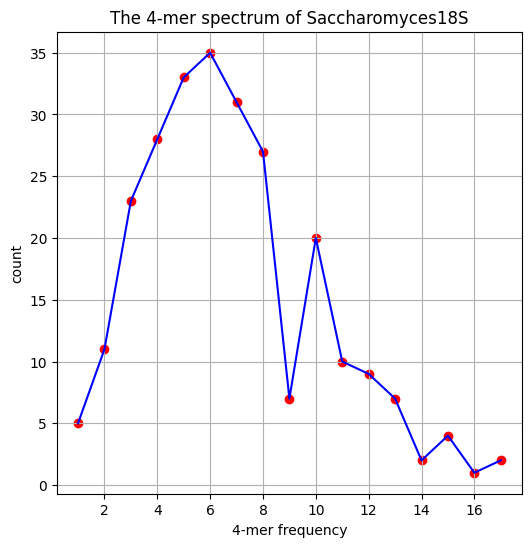


Enter a string of lenght 4 composed of A, C, T, G, enter Q to quit : q


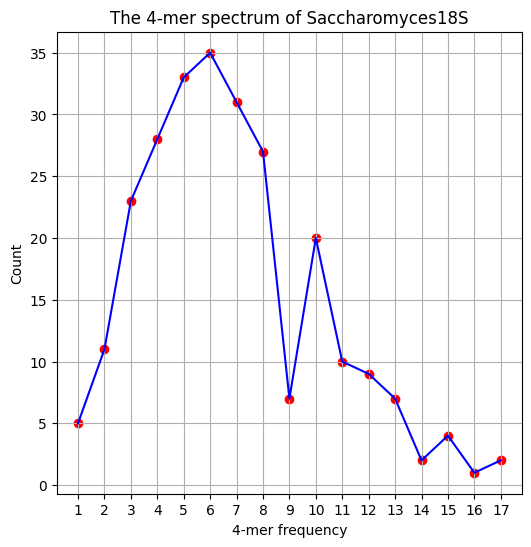

In [65]:
# Your code for parts A and B go here
four_mer_frequency = {}

filename = 'Saccharomyces18S.txt'
with open(filename, 'r') as input_file:
  file_content = input_file.read()

for i in range(len(file_content)-4): # stops looping at fourth-to-last letter to prevent out of bounds
  substr = file_content[i:i+4] # substring logic to create a substring out of each possible four-letter sequence in file
  if substr in four_mer_frequency:
    four_mer_frequency[substr] +=1
  else:
    four_mer_frequency[substr] = 1

# Query code for the dictionary from part B.  Do not change this
user_input = input('Enter a string of lenght 4 composed of A, C, T, G, enter Q to quit : ')
while user_input[0] not in 'qQ':
  print(f'{user_input} occurs {four_mer_frequency.get(user_input.upper(), -1)} times')
  user_input = input('Enter a string of lenght 4 composed of A, C, T, G, all caps : ')

# Your solution for part C goes here---------------

# using 4-mer/freq dictionary from above

freq_count = {} # tracking how many 4-mers have a given freq

for indiv_frequency_value in four_mer_frequency.values(): # only need actual freq values, also, logic for creating dict based on unique values and freqs taken from past two probs
  if indiv_frequency_value in freq_count:
    freq_count[indiv_frequency_value] += 1 # tracking num of k-mers (value) with this given frequency (key) for multiplicity
  else:
    freq_count[indiv_frequency_value] = 1 # initializes frequ dict for frequency/multiplicty of frequ_values of indiv mers for each given frequency

# I have provided an outline of the graphing code - you need to modify this code to plot the 4-spectrum
import matplotlib.pyplot as plt
import numpy as np  # numpy also has lots of built in math functions

plt.figure(figsize = (6, 6))

x_list = sorted(freq_count.keys()) # ensures that keys (given frequencies) are in ascending order for x-axis insertion and ordering
y_list = [freq_count[f] for f in x_list] # creates list for # of 4-mers (frequency counts) (values) of freq dict to be plotted
# IMPT note: need to iterate through x_list rather than freq_count dict itself for corresponding y-values of #-of-4-mers that have that frequency
# b/c need the dict-value (# of 4-mers with that freq) that correspond to the correct ordering of the frequency options in the context of the x-axis,
# which x_list provides b/c it's sorted()

plt.plot(x_list, y_list, color = 'blue') # lines
plt.scatter(x_list, y_list, color = 'red') # points

# add a title to the plot
plt.title(f'The 4-mer spectrum of Saccharomyces18S')
plt.xticks(x_list)
plt.xlabel(f'4-mer frequency')
plt.ylabel('Count')
plt.grid()
plt.show()